# K Nearest Neighbors Project #

In this project we'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

## Import Libraries ##

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Get the data ##

 (This data is artificial)

In [5]:
df = pd.read_csv ('KNN_Project_Data')

In [6]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


## Standardize the Variables ##

**Importing StandardScaler from Scikit learn.**

In [8]:
from sklearn.preprocessing import StandardScaler

**Creating a StandardScaler() object called scaler.**

In [9]:
scaler = StandardScaler()

**Fitting scaler to the features.**

In [10]:
scaler.fit (df.drop('TARGET CLASS', axis=1))

StandardScaler()

**Using the .transform() method to transform the features to a scaled version.**

In [11]:
scaled_feature = scaler.transform(df.drop('TARGET CLASS', axis=1))

**Converting the scaled feature to a dataframe and check the head of this dataframe to make sure the scalling worked**

In [12]:
df_feat = pd.DataFrame(scaled_feature, columns=df.columns[:-1])

In [13]:
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train Test Split #

using train_test_split to split the data into a training set and a testing set.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df_feat
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.3, random_state= 101)

# Using KNN #

importing KNeighborsClassifier from scikit learn.

In [16]:
from sklearn.neighbors import KNeighborsClassifier

**Creating a KNN model to the training data** 

In [17]:
knn = KNeighborsClassifier (n_neighbors=1)

**Fitting this KNN model to the training data.**

In [18]:
knn.fit (X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# Prediction and evaluation #

Now let's evaluate our KNN model.


**Using the predict method to predict values using our KNN model and X_test.**

In [19]:
predict = knn.predict (X_test)

**Creating a confusion matrix and classification report.**

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print (confusion_matrix(y_test, predict))

[[109  43]
 [ 41 107]]


In [22]:
print (classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



# Choosing a K value #

use the elbow method to pick a good K Value!


**Creating a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list.**

In [23]:
error_rate = []

for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

<IPython.core.display.Javascript object>


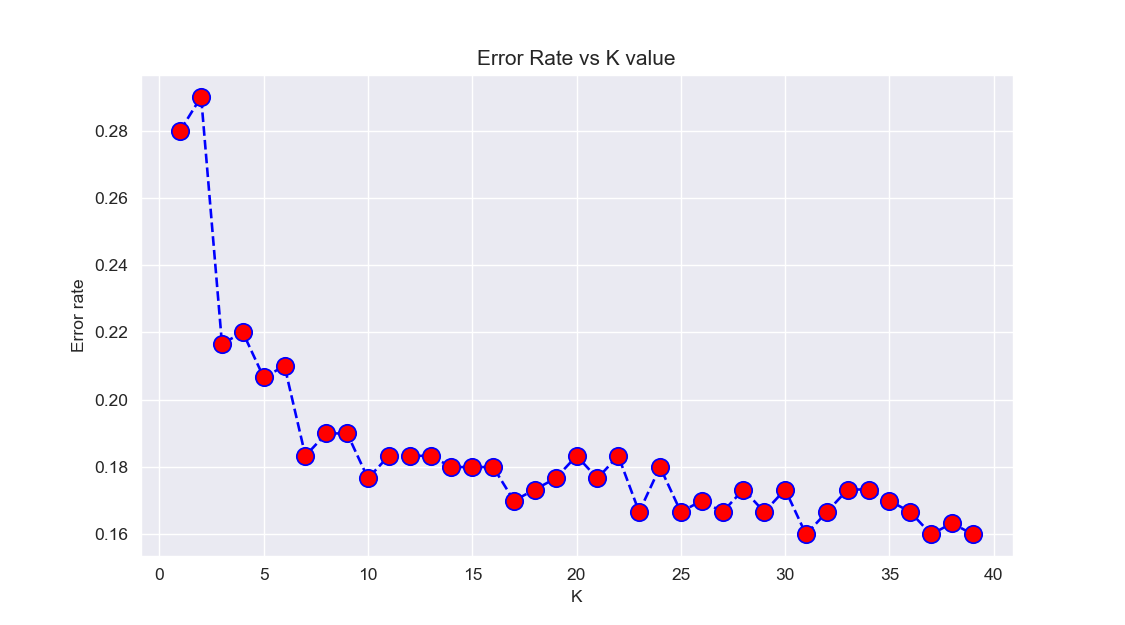

Text(0, 0.5, 'Error rate')

In [26]:
sns.set_style ('darkgrid')
plt.figure (figsize =(9,5))
plt.plot(range(1,40),error_rate, color='blue', linestyle = 'dashed', marker = 'o',
         markerfacecolor = 'red', markersize = 10)
plt.title ('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error rate')

# Retrain with new K Value #

**Retraining the model with the best K value and re-do the classification report and the confusion matrix.**

In [27]:
# NOW WITH K=30
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[124  28]
 [ 24 124]]


              precision    recall  f1-score   support

           0       0.84      0.82      0.83       152
           1       0.82      0.84      0.83       148

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

